In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from helpers.SimulationAnalysis import readHlist
from fast3tree import fast3tree
from notebook_load_functions import *

In [5]:
plt.rcdefaults()
%matplotlib inline
plt.rcParams['font.size'] = 16.0
plt.rcParams['font.family'] = 'serif'

In [2]:
#load data
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
cases = ['c250-2048', 'c250-1024', 'c250-768', 'c250-512','c250-2560',
         'c400-2048', 'c400-1024', 'c400-768', 'c125-2048', 'c125-1024']
nd_log_list = np.linspace(-3.3, -1.7, 17)

rbins = np.logspace(-1.3, 1.3, 27)

def res_ratio(case):
    box_size, npart, mass = parse_boxname(case)
    masshigh = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
    return mass/masshigh

def res_diff(case):
    box_size, npart, mass = parse_boxname(case)
    masshigh = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
    return mass - masshigh


# plot pair count difference over highres JK error

In [6]:
cases_sorted = ['c250-2048', 'c250-1024', 'c250-768', 'c250-512',
          'c400-1024', 'c400-768', 'c125-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)

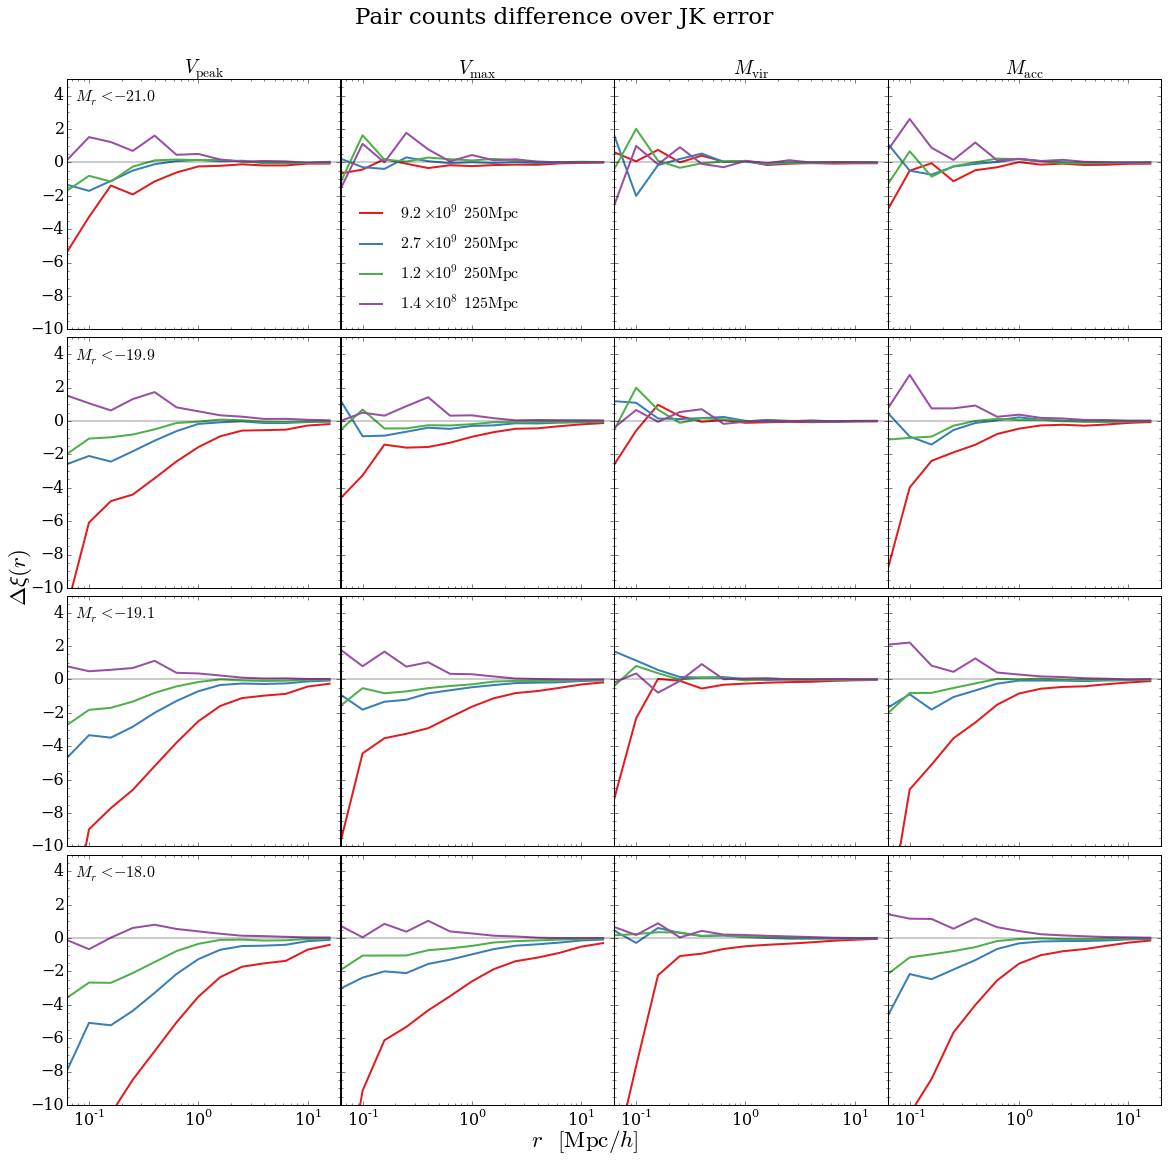

In [21]:
from palettable.colorbrewer.qualitative import Set1_5
def get_color_2(case):
    return Set1_5.mpl_colors[cases_sorted.index(case)]

x = rbins[1::2]
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
cases_sorted = ['c250-512','c250-768', 'c250-1024','c125-1024']
#cases_sorted = ['c400-1024','c400-768']
nd_log_list_this = (-2.6, -2.2, -2.0, -1.8)
nJK = 5 

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(16, 4*len(nd_log_list_this)), sharex=True, sharey=True)

for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for case in cases_sorted:
            box_size, npart, mass = parse_boxname(case)
            num = load_pair_count(proxy, case, nd_log)
            den = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            y = num - den
            lowJK = load_precalculated_JK(proxy, case, nd_log, nJK = nJK)
            if box_size == 125.:
                highJK = load_precalculated_JK(proxy, case.split('-')[0] + '-2048-new', nd_log, nJK = nJK)
            else:
                highJK = load_precalculated_JK(proxy, case.split('-')[0] + '-2048', nd_log, nJK = nJK)
            error = JK_std(highJK, axis = 0)
            ax_this.semilogx(x, y/error, c=get_color_2(case), lw=2, ls=('-'), 
                             label=r'${0:.1f} \times 10^{{{1}}}$ '.format(*frexp10(mass)) + r'${0:d}{{\rm Mpc}}$'.format(int(box_size)));
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        ax_this.set_xlim(rbins[1], rbins[-1]);
        ax_this.set_ylim(-10.0, 5.0);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.03, 0.96, '$M_r < {:.1f}$'.format(af.match(10.0**nd_log)), transform=ax_this.transAxes, va='top');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=1, fontsize='medium');
            
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Pair counts difference over JK error', fontsize='x-large')
#plt.savefig('plots/pair_count_diff_over_JK_error.png')

# plot pair count difference over multidark sample variance

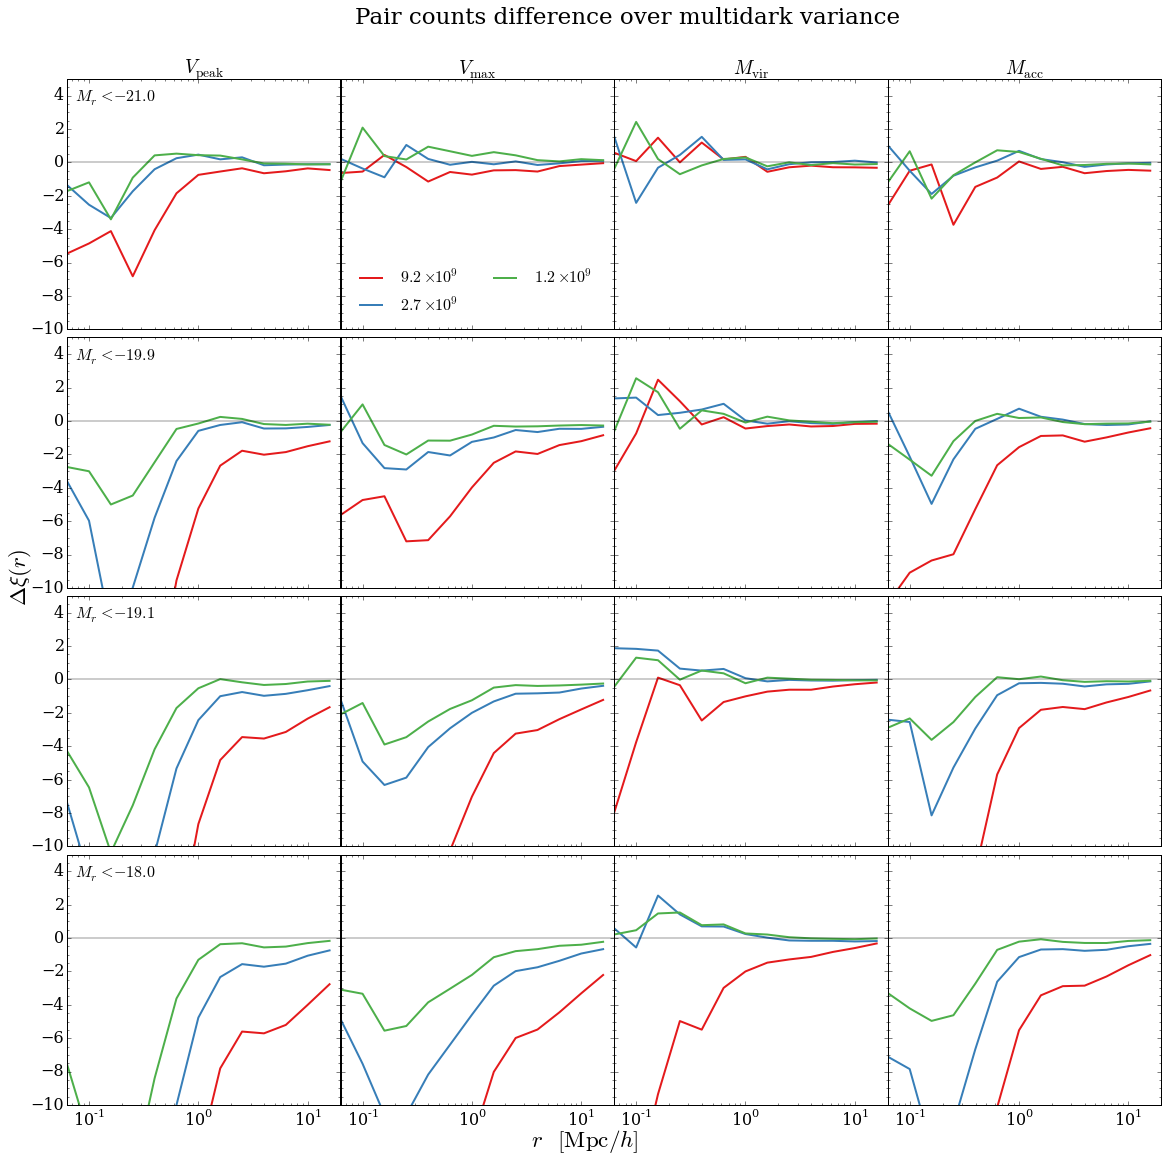

In [51]:
from palettable.colorbrewer.qualitative import Set1_3
def get_color_2(case):
    return Set1_3.mpl_colors[cases_sorted.index(case)]

x = rbins[1::2]
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
cases_sorted = ['c250-512','c250-768', 'c250-1024']
#cases_sorted = ['c400-1024','c400-768']
nd_log_list_this = (-2.6, -2.2, -2.0, -1.8)
nJK = 5 

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(16, 4*len(nd_log_list_this)), sharex=True, sharey=True)

for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for case in cases_sorted:
            box_size, npart, mass = parse_boxname(case)
            num = load_pair_count(proxy, case, nd_log)
            den = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            y = num - den
            
            #load multidark sample and compute sample variance
            samples = load_samples(proxy, nd_log, 250.)
            error = np.std(samples, axis=0)
            ax_this.semilogx(x, y/error, c=get_color_2(case), lw=2, ls=('-'), label=r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(mass)));
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        ax_this.set_xlim(rbins[1], rbins[-1]);
        ax_this.set_ylim(-10.0, 5.0);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.03, 0.96, '$M_r < {:.1f}$'.format(af.match(10.0**nd_log)), transform=ax_this.transAxes, va='top');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='medium');
            
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Pair counts difference over multidark variance', fontsize='x-large')
#plt.savefig('plots/pair_count_diff_over_Multidark_error.png')

## missing pairs as a function of scale

In [6]:
cases_sorted = ['c250-1024', 'c250-768', 'c250-512',
          'c400-1024', 'c400-768', 'c125-1024']
cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = sorted(cases_sorted, key=lambda case: res_ratio(case), reverse=True)
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)
#cases_sorted = sorted(cases_sorted, key=lambda case: res_diff(case), reverse=True)

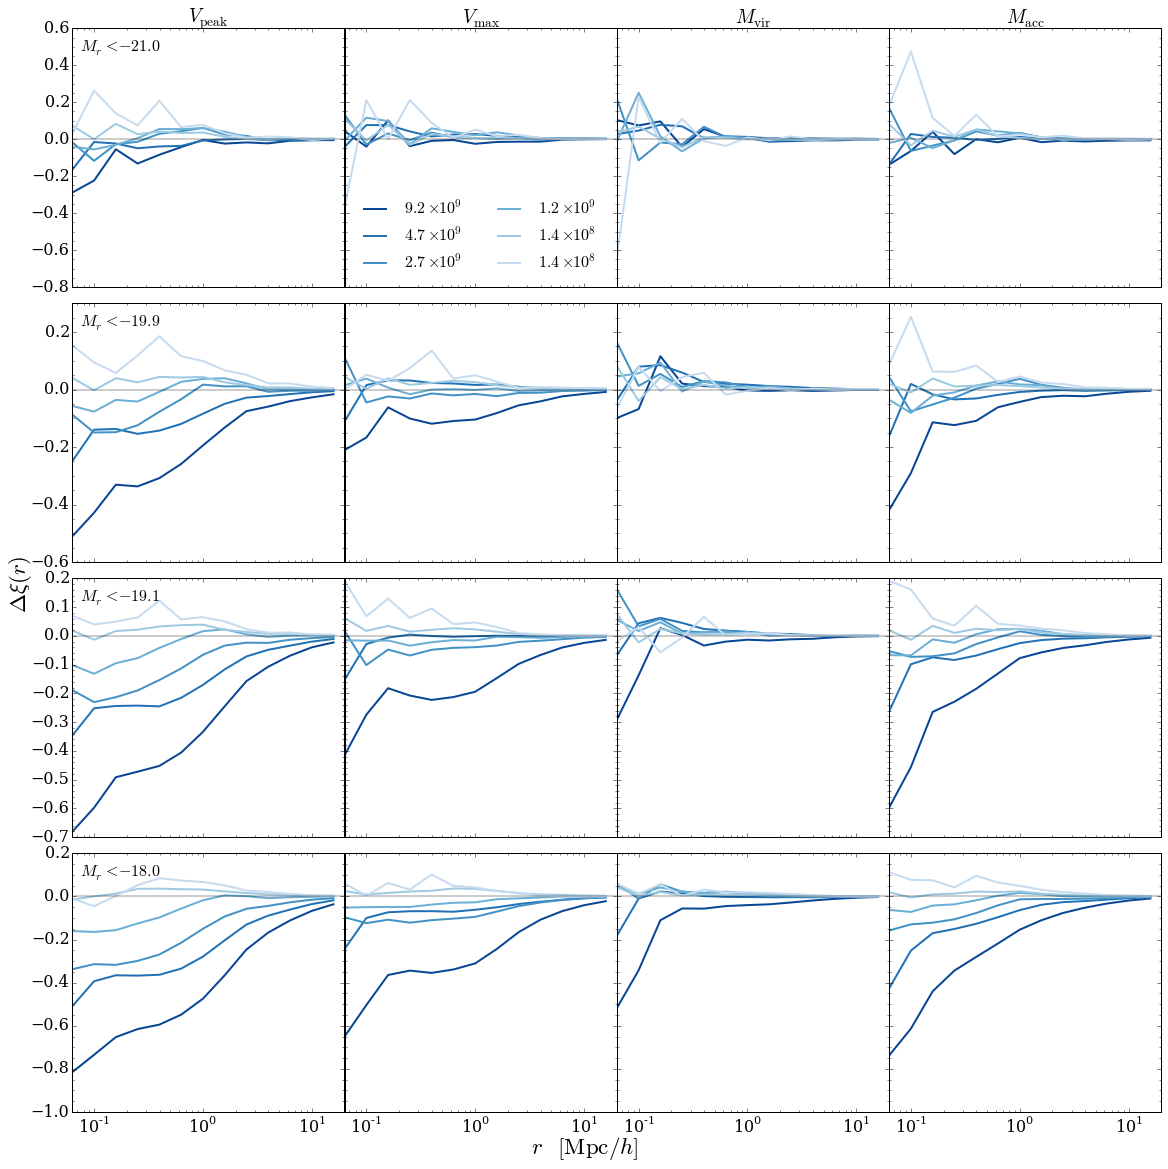

In [7]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]

x = rbins[1::2]
nd_log_list_this = (-2.6, -2.2, -2.0, -1.8)
 
fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(16, 4*len(nd_log_list_this)), sharex=True, sharey='row')

for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for k,case in enumerate(cases_sorted):
            box_size, npart, mass = parse_boxname(case)
            y = load_pair_count(proxy, case, nd_log)/load_pair_count(proxy, case.partition('-')[0]\
                                                                     +('-2048' if box_size!=250. else '-2560'), nd_log) - 1.0
            ax_this.semilogx(x, y, c=get_color(k), lw=2, ls='-', label=r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(mass)));
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        ax_this.set_xlim(rbins[1], rbins[-1]);
        #ax_this.set_ylim(-0.4, 0.4);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.03, 0.96, '$M_r < {:.1f}$'.format(af.match(10.0**nd_log)), transform=ax_this.transAxes, va='top');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='medium');
            
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');

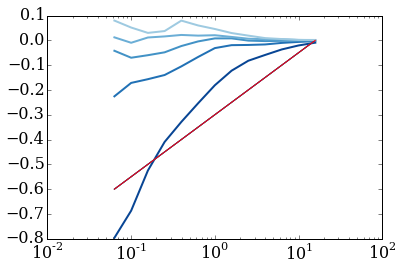

In [128]:
proxy = 'macc'
nd_log = -1.7
x = rbins[1::2]

def fitfunc(r): 
    if np.log10(r) > 1.2:
        return 0
    return (np.log10(r)-1.2)*0.25

for k,case in enumerate(cases_sorted):
    box_size, npart, mass = parse_boxname(case)
    y = load_pair_count(proxy, case, nd_log)/load_pair_count(proxy, case.partition('-')[0]\
                                                             +('-2048' if box_size!=250. else '-2560'), nd_log) - 1.0
    plt.semilogx(x, y, c=get_color(k), lw=2, ls='-', label=r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(mass)));
    fit = np.array([fitfunc(r) for r in x])
    plt.semilogx(x,fit)

### modeling r dependence with a spline

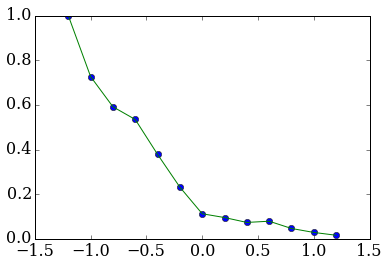

In [157]:
from scipy.interpolate import interp1d
proxy = 'macc'
cases = ['c250-512','c250-768']
ysum = np.zeros_like(rbins[1::2])
nd_log_list_this = np.linspace(-2.2, -1.7, 6)
for case in cases:
    for nd_log in nd_log_list_this:
        x = np.log10(rbins[1::2])
        y = load_pair_count(proxy, case, nd_log)/load_pair_count(proxy, case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'), nd_log) - 1.0
        ysum += y/y[0]
ysum = ysum/len(nd_log_list_this)/len(cases)
f2 = interp1d(x, ysum, kind='cubic')
plt.plot(x,ysum,'o')
plt.plot(x,f2(x))

## missing pairs vs. resolution
* for fixed scales

### can we separate scale r?
* column: proxies
* row: scale
* x-axis: resolution(M)
* lines: number density


In [42]:
cases_sorted = ['c250-1024', 'c250-768', 'c250-512',
          'c400-1024', 'c400-768', 'c125-1024']
cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: res_ratio(case), reverse=True)
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)
#cases_sorted = sorted(cases_sorted, key=lambda case: res_diff(case), reverse=True)

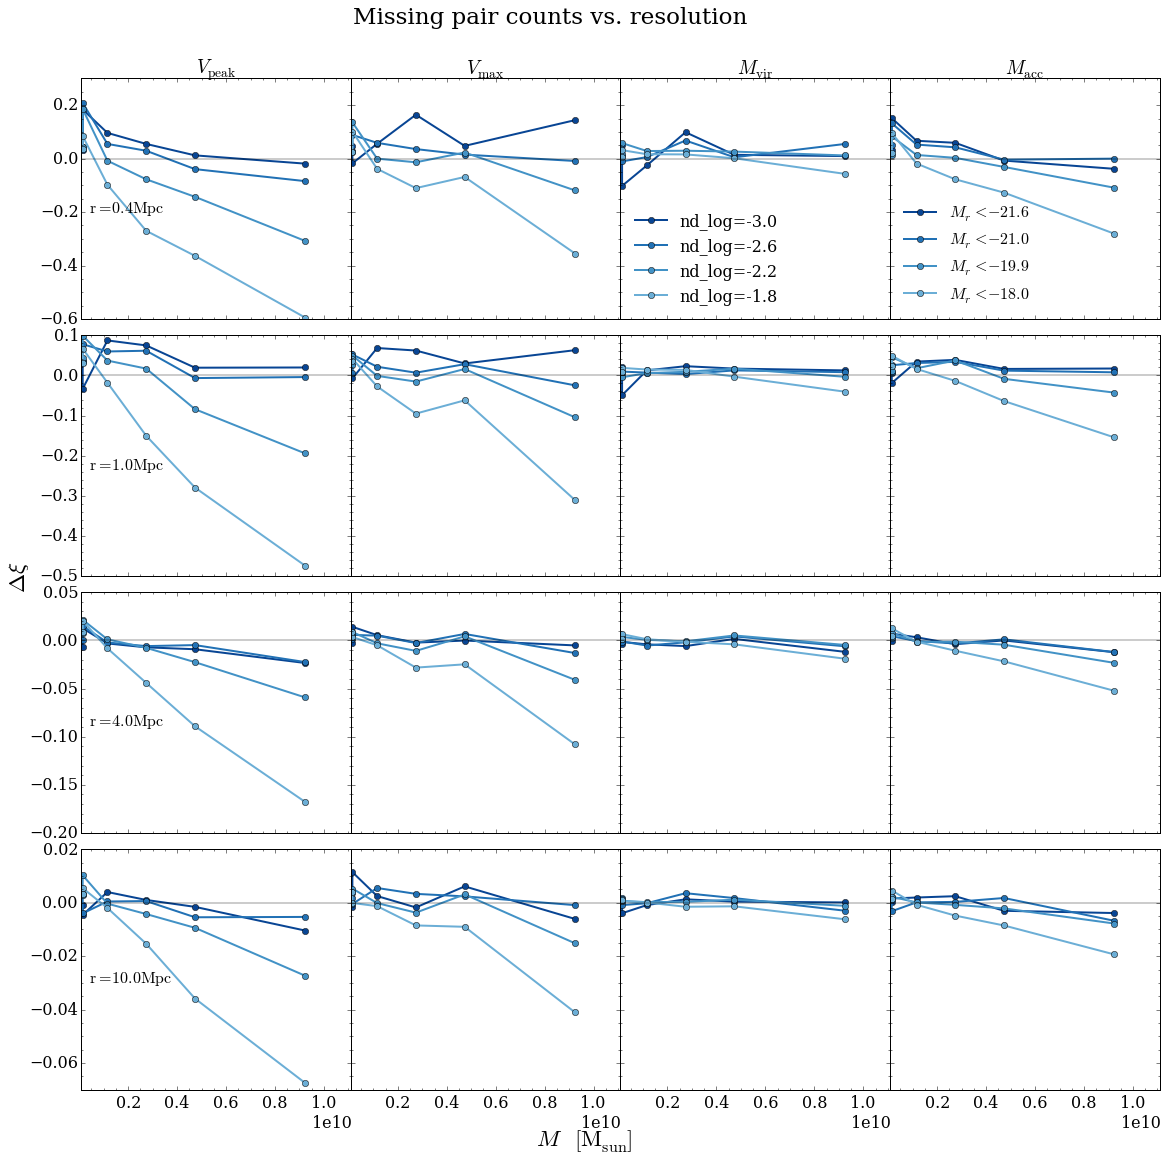

In [43]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]

proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [0.4,1.,5., 10.]
nd_log_list_this = (-3.0, -2.6, -2.2, -1.8)
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(scales), figsize=(4*len(proxies), 4*len(scales)), sharex=True, sharey='row')
for i, (ax_row, scale) in enumerate(zip(ax, scales)):
    ridx = closest_ridx(scale)
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for nd_log in nd_log_list_this:
            resolution = np.zeros(len(cases_sorted))
            pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))
            for ii, case in enumerate(cases_sorted):
                box_size, npart, mass = parse_boxname(case)
                masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
                resolution[ii] = mass 
                for jj, nd_log in enumerate(nd_log_list_this):
                    low = load_pair_count(proxy, case, nd_log)
                    if box_size == 250.:
                        high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
                    else:
                        high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
                    pairdiff[jj,ii] = (low-high)/high
        for ii, nd_log in enumerate(nd_log_list_this):
            ax_this.plot(resolution, pairdiff[ii,:,ridx], '-o', lw=2, c=get_color(ii), label=nd_log)
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        ax_this.set_xlim( 0.5*resolution[-1],resolution[0]*1.2);
        #if i==0: ax_this.set_ylim(-0.5, 0.1);
        #if i==1: ax_this.set_ylim(-0.1, 0.02);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.03, 0.5, r'${{\rm r}} = {0:.1f} {{\rm Mpc}}$'.format(rbins[1::2][ridx]), transform=ax_this.transAxes, va='top', fontsize='medium');
        if i==0 and j==2: ax_this.legend(['nd_log={}'.format(nd_log) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, fontsize='medium', numpoints=1);
        if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$M \; [{\rm M_{sun}}]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Missing pair counts vs. resolution', fontsize='x-large')
#plt.savefig('plots/test/missing_pairs_vs_resolutiondiff.png')

In [9]:
def res_ratio(case):
    box_size, npart, mass = parse_boxname(case)
    masshigh = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
    return mass/masshigh

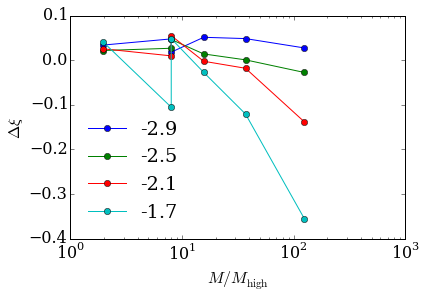

In [87]:
cases_sorted = ['c250-1024', 'c250-768', 'c250-512',
          'c400-1024', 'c400-768', 'c125-1024']
cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: res_ratio(case), reverse=True)
#cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)

proxy = 'vmax'
nd_log_list_this = (-2.9, -2.5, -2.1, -1.7)
resolution = np.zeros(len(cases_sorted))
pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))

for i, case in enumerate(cases_sorted):
    box_size, npart, mass = parse_boxname(case)
    masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
    resolution[i] = mass/masshighres
    for j, nd_log in enumerate(nd_log_list_this):
        low = load_pair_count(proxy, case, nd_log)
        if box_size == 250.:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
        else:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
        pairdiff[j,i] = (low-high)/high
for i, nd_log in enumerate(nd_log_list_this):
    plt.semilogx(resolution, pairdiff[i,:,6], '-o', label=nd_log)
plt.legend(frameon=False, numpoints=1, loc='best')
plt.xlabel(r'$M/M_{{\rm high}} $')
plt.ylabel(r'$\Delta \xi$')

### can we separate out number density from resolution?
* column: proxies
* row: number density
* x-axis: resolution(M)
* lines: scale (r)

Probably not

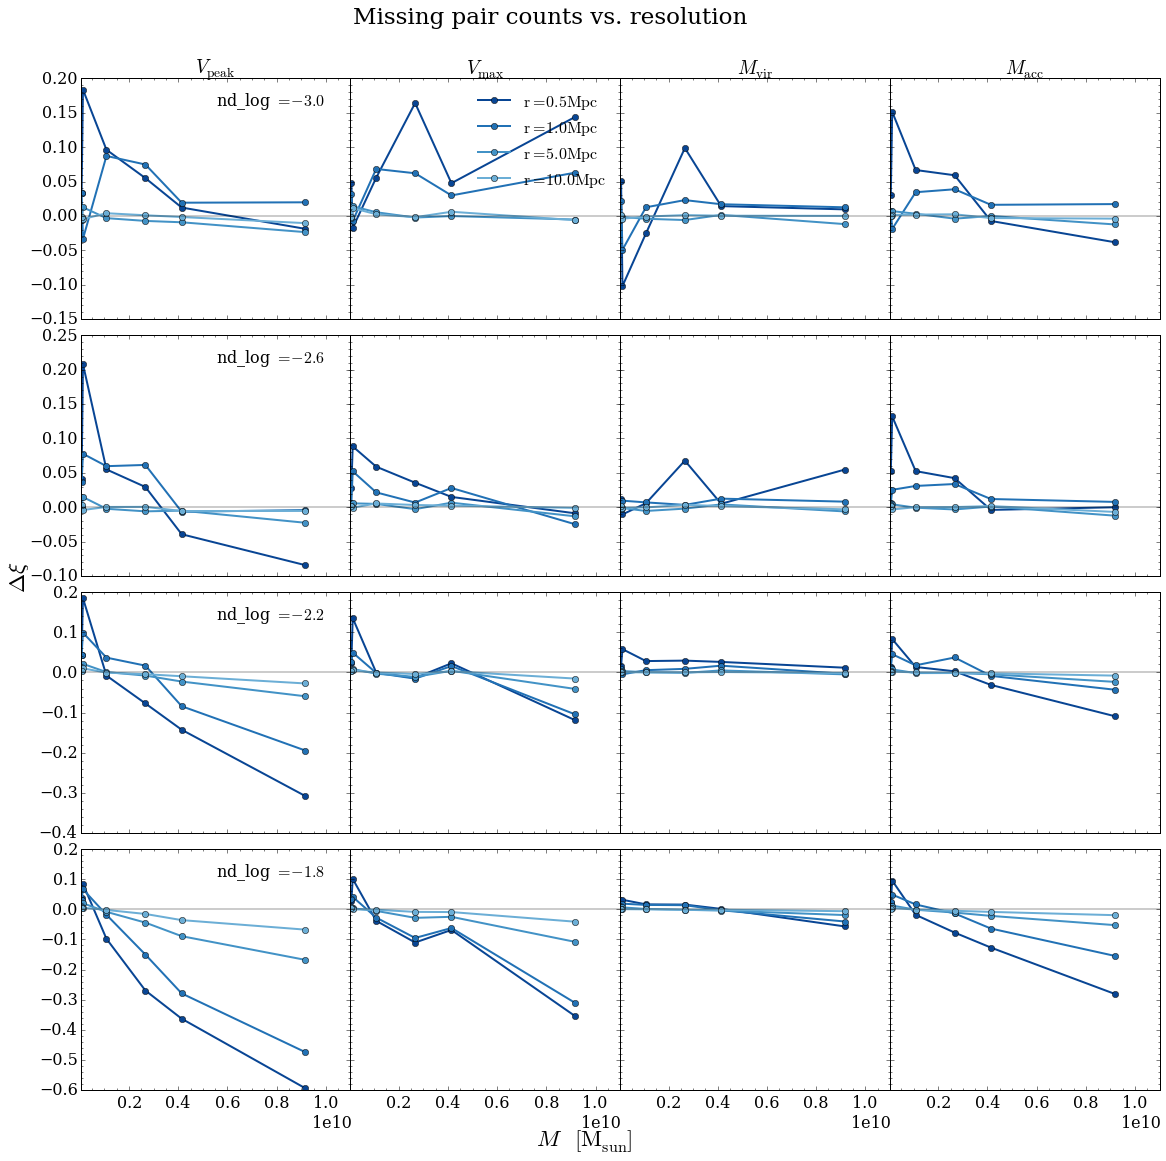

In [37]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]

proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [0.5,1.,5., 10.]
nd_log_list_this = (-3.0, -2.6, -2.2, -1.8)
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(4*len(proxies), 4*len(nd_log_list_this)), sharex=True, sharey='row')
for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        resolution = np.zeros(len(cases_sorted))
        pairdiff = np.zeros((len(cases_sorted), len(rbins[1::2])))
        for ii, case in enumerate(cases_sorted):
            box_size, npart, mass = parse_boxname(case)
            masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
            resolution[ii] = mass - masshighres             
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            pairdiff[ii] = (low-high)/high
        for ii, r in enumerate(scales):
            ax_this.plot(resolution, pairdiff[:,closest_ridx(r)], '-o', lw=2, c=get_color(ii), label=r'${{\rm r}} = {0:.1f} {{\rm Mpc}}$'.format(r))
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        ax_this.set_xlim( 0.5*resolution[-1],resolution[0]*1.2);
        #if i==0: ax_this.set_ylim(-0.5, 0.1);
        #if i==1: ax_this.set_ylim(-0.1, 0.02);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.5, 0.95, r'nd_log $ = {0:.1f}$'.format(nd_log), transform=ax_this.transAxes, va='top', fontsize='medium');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=1, fontsize='medium', numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$M \; [{\rm M_{sun}}]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Missing pair counts vs. resolution', fontsize='x-large')
#plt.savefig('plots/test/missing_pairs_vs_resolutiondiff.png')

## number density as the x axis, scale as row, resolution(or mass ratio) as different lines
* x-axis: number density
* row: scale
* columns: proxies
* resolution: lines



In [44]:
cases_sorted = ['c250-1024', 'c250-768', 'c250-512',
          'c400-1024', 'c400-768', 'c125-1024']
cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = sorted(cases_sorted, key=lambda case: res_ratio(case), reverse=True)
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)

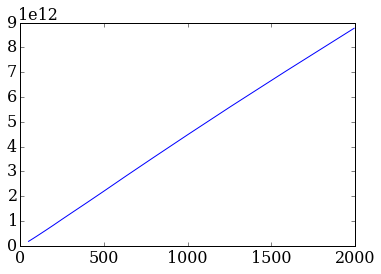

In [109]:
plt.plot(10.**-nd_log_list, load_nd_limits('mvir','c250-1024'))

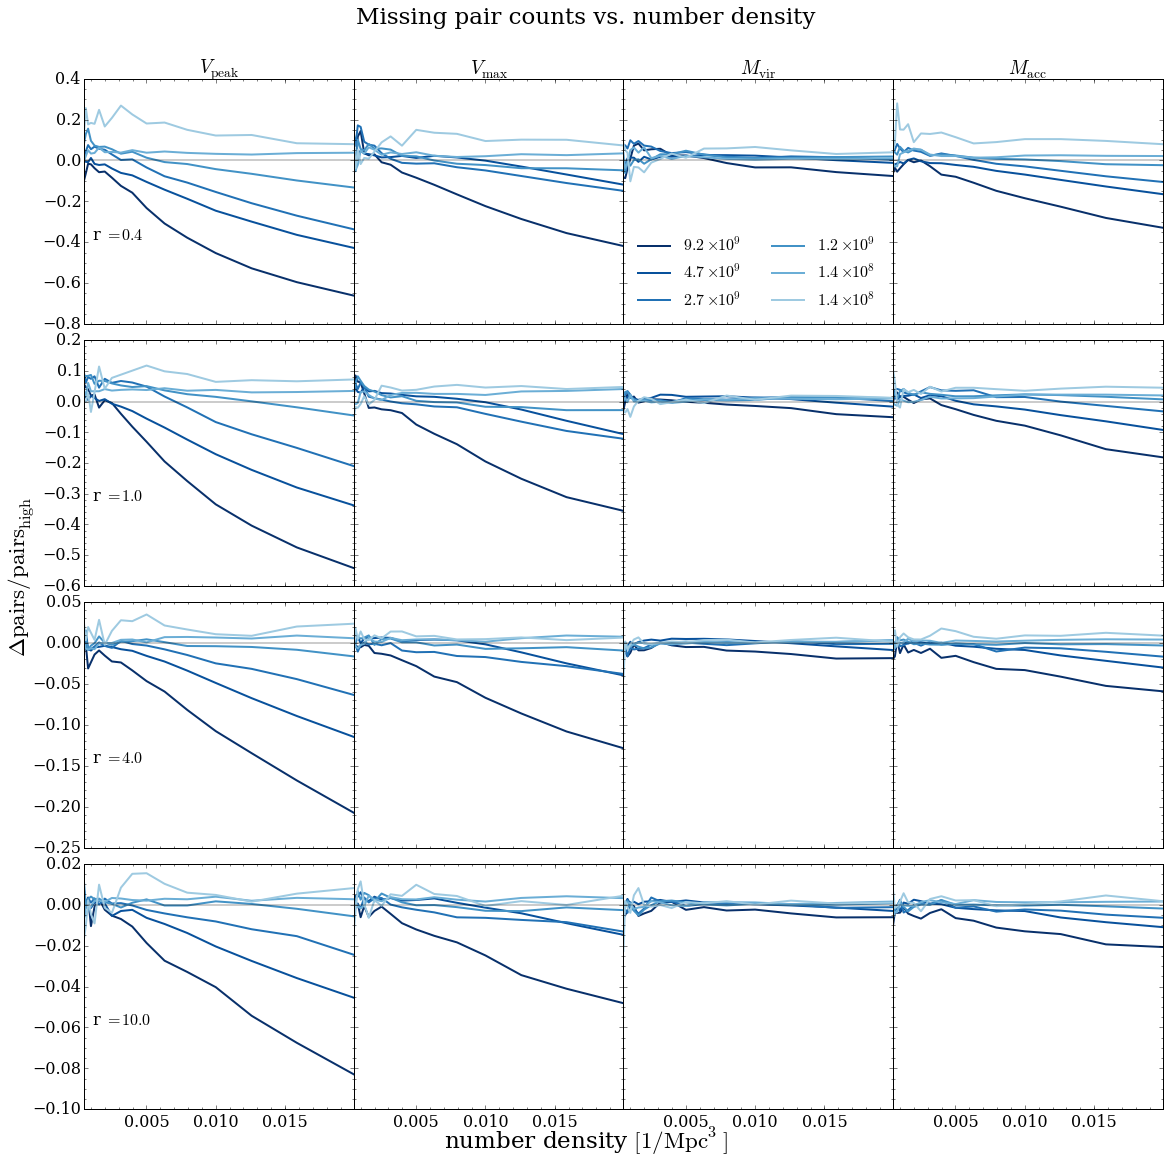

In [110]:
from palettable.colorbrewer.sequential import Blues_9#RdYlBu_4
def get_color(i):
    return Blues_9.mpl_colors[::-1][i]

proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [0.5,1.,5., 10.]
nd_log_list_this = (-3.0, -2.6, -2.2, -1.8)
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(scales), figsize=(4*len(proxies), 4*len(scales)), sharex='col', sharey='row')
for i, (ax_row, r) in enumerate(zip(ax, scales)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        pairdiff = np.zeros((len(cases_sorted),len(nd_log_list), len(rbins[1::2])))
        for ii, case in enumerate(cases_sorted):
            box_size, npart, mass = parse_boxname(case)
            for jj, nd_log in enumerate(nd_log_list):
                low = load_pair_count(proxy, case, nd_log)
                if box_size == 250.:
                    high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
                else:
                    high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
                pairdiff[ii,jj] = (low-high)/high
        for ii, case in enumerate(cases_sorted):
            box_size, npart, mass = parse_boxname(case)
            masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
            proxycut = load_nd_limits('mvir', case)
            ax_this.plot(10.**nd_log_list, pairdiff[ii,:,closest_ridx(r)], '-', lw=2, c=get_color(ii), label=r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(mass)))
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        #ax_this.set_xlim(0.7*proxycut[-1],proxycut[0]*1.5);
        ax_this.set_xlim(10.**nd_log_list[0],10.**nd_log_list[-1]);
        #if i==0: ax_this.set_ylim(-0.5, 0.1);
        #if i==1: ax_this.set_ylim(-0.1, 0.02);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.03, 0.4, r'r $ = {0:.1f}$'.format(rbins[1::2][closest_ridx(r)]), transform=ax_this.transAxes, va='top', fontsize='medium');
        if i==0 and j==2: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='medium', numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta {\rm pairs}/{\rm pairs_{high}}$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'number density $[{\rm 1/Mpc^3}]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Missing pair counts vs. number density', fontsize='x-large')
#fig.savefig('plots/missing_pairs_vs_number_density.png')

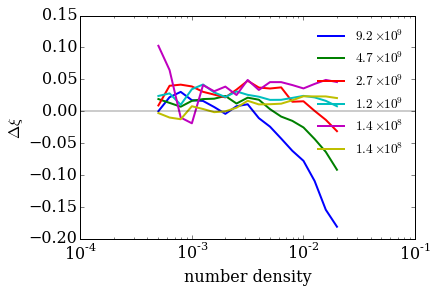

In [13]:
proxy = 'macc'

nd_log_list_this = (-3.0, -2.6, -2.2, -1.8)
resolution = np.zeros(len(cases_sorted))
pairdiff = np.zeros((len(cases_sorted), len(nd_log_list), len(rbins[1::2])))

for i, nd_log in enumerate(nd_log_list):
    for j, case in enumerate(cases_sorted):
        box_size, npart, mass = parse_boxname(case)
        resolution[j] = mass
        low = load_pair_count(proxy, case, nd_log)
        if box_size == 250.:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
        else:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
        pairdiff[j,i] = (low-high)/high
for i, case in enumerate(cases_sorted):
    mass = parse_boxname(case)[2]
    plt.semilogx(10**nd_log_list, pairdiff[i,:,6], '-',lw=2, label=r'${0:.1f} \times 10^{{{1}}}$'.format(*frexp10(mass)))
plt.axhline(0, c='k', lw=0.4);
plt.legend(frameon=False, numpoints=1, loc='best', fontsize='small')
plt.xlabel(r'number density')
plt.ylabel(r'$\Delta \xi$')

## modeling missing pairs
${\rm missing \, pairs} = A(r) B_{nd}({\rm mass})$

${\rm missing \, pairs} = A(r) \left( \exp(- B \frac{nd*M}{M_*})- \exp(- B \frac{nd*M_{ \rm high}}{M_*}) \right) $

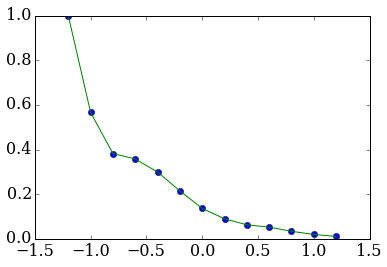

In [7]:
from scipy.interpolate import interp1d
proxy = 'macc'
cases = ['c250-512','c400-1024']
ysum = np.zeros_like(rbins[1::2])
nd_log_list_this = np.linspace(-2.2, -1.7, 6)
for case in cases:
    for nd_log in nd_log_list_this:
        x = np.log10(rbins[1::2])
        box_size = parse_boxname(case)[0]
        y = load_pair_count(proxy, case, nd_log)/load_pair_count(proxy, case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'), nd_log) - 1.0
        ysum += y/y[0]
ysum = ysum/len(nd_log_list_this)/len(cases)
f_macc = interp1d(x, ysum, kind='cubic')
plt.plot(x,ysum,'o')
plt.plot(x,f_macc(x))

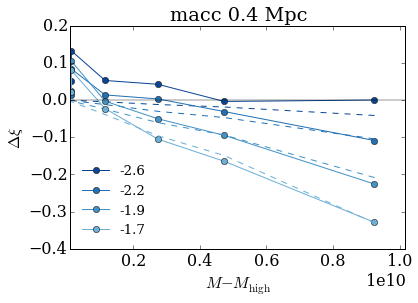

In [8]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()

cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024']
#cases_sorted = sorted(cases_sorted, key=lambda case: res_ratio(case), reverse=True)
cases_sorted = sorted(cases_sorted, key=lambda case: res_diff(case), reverse=True)
#cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)


proxy = 'macc'
r = 0.5
nd_log_list_this = (-2.6, -2.2,-1.9, -1.7)
resolution = np.zeros(len(cases_sorted))
masslist = np.zeros((len(cases_sorted),2))
pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))

for i, case in enumerate(cases_sorted):
    box_size, npart, mass = parse_boxname(case)
    masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
    resolution[i] = mass
    masslist[i] = np.array([mass, masshighres])
    for j, nd_log in enumerate(nd_log_list_this):
        low = load_pair_count(proxy, case, nd_log)
        if box_size == 250.:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
        else:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
        pairdiff[j,i] = (low-high)/high
def fitfunc_r(r): 
    return f_macc(np.log10(r))*7*1000
    
def fitfunc(m, nd_log, r):  
    return (np.exp(-10.**nd_log*m/10.**12) - 1.0)*fitfunc_r(r)

for i, nd_log in enumerate(nd_log_list_this):
    plt.plot(resolution, pairdiff[i,:,closest_ridx(r)], '-o', label=nd_log, c=get_color(i))
    fit = np.array([fitfunc(m,nd_log,r) - fitfunc(mh, nd_log,r) for m, mh in masslist])
    plt.plot(resolution, fit, '--', c=get_color(i))
plt.axhline(0, c='k', lw=0.4);
#plt.plot(resolution, fit)
plt.title('{} {:.1f} Mpc'.format(proxy, rbins[1::2][closest_ridx(r)]))
plt.xlim(0.8*resolution[-1], 1.1*resolution[0])
plt.legend(frameon=False, numpoints=1, loc='best', fontsize='small')
plt.xlabel(r'$M-M_{{\rm high}} $')
plt.ylabel(r'$\Delta \xi$')

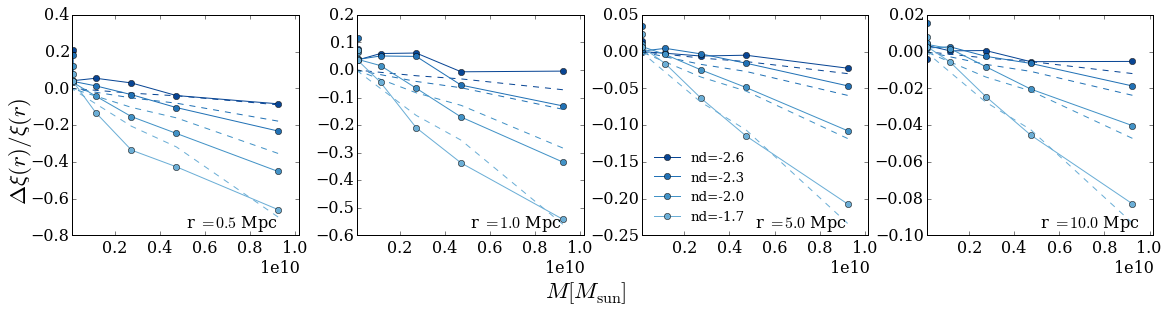

In [72]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()
#vpeak
def fitfunc_r(r): 
    if np.log10(r) > 1.2:
        return 0
    return (1.2 - np.log10(r))*13
def fitfunc(m, nd_log, r):  
    return (np.exp(-2.*10.**nd_log*m/10.**10) - 1.0)*fitfunc_r(r)
#vmax
#def fitfunc_r(r): 
#    if np.log10(r) > 1.2:
#        return 0
#    return (1.2 - np.log10(r))*1.4*1000
#def fitfunc(m, nd_log, r):  
#    return (np.exp(-10.**nd_log*m/10.**12) - 1.0)*fitfunc_r(r)

#macc
#def fitfunc_r(r): 
#    return f_macc(np.log10(r))*7*1000
    
#def fitfunc(m, nd_log, r):  
#    return (np.exp(-10.**nd_log*m/10.**12) - 1.0)*fitfunc_r(r)


cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)

proxy = 'vpeak'
scales = (0.5,1.,5.,10.)
nd_log_list_this = (-2.6, -2.3, -2.0, -1.7)


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    resolution = np.zeros(len(cases_sorted))
    masslist = np.zeros((len(cases_sorted),2))
    pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))
    for i, case in enumerate(cases_sorted):
        box_size, npart, mass = parse_boxname(case)
        masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
        resolution[i] = mass
        masslist[i] = np.array([mass, masshighres])
        for j, nd_log in enumerate(nd_log_list_this):
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            pairdiff[j,i] = (low-high)/high
    for i, nd_log in enumerate(nd_log_list_this):
        ax.plot(resolution, pairdiff[i,:,closest_ridx(r)], '-o', label='nd='+str(nd_log), c=get_color(i))
        fit = np.array([fitfunc(m,nd_log,r) - fitfunc(mh, nd_log,r) for m, mh in masslist])
        ax.plot(resolution, fit, '--', c=get_color(i))
    
    ax.text(0.5, 0.1, r'r $ = {0:.1f}$ Mpc'.format(r), transform=ax.transAxes, va='top', fontsize='medium');
    ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    if ii==2: ax.legend(frameon=False, numpoints=1, loc='best',fontsize='small')
            
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$M[M_{{\rm sun}}]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/modeling_macc.png')

### use number of particles at cutoff to do the fittings

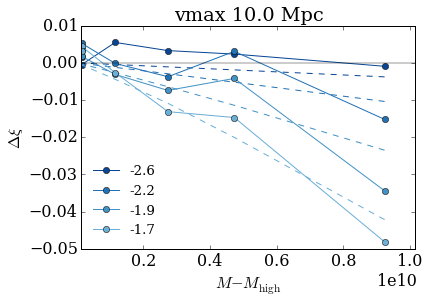

In [47]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()
def closest_ndidx(nd):
    return np.abs(nd_log_list-nd).argmin()

cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024']
#cases_sorted = sorted(cases_sorted, key=lambda case: res_ratio(case), reverse=True)
cases_sorted = sorted(cases_sorted, key=lambda case: res_diff(case), reverse=True)
#cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)


proxy = 'vmax'
r = 10
nd_log_list_this = (-2.6, -2.2,-1.9, -1.7)
resolution = np.zeros(len(cases_sorted))
masslist = np.zeros((len(cases_sorted),2))
pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))

for i, case in enumerate(cases_sorted):
    box_size, npart, mass = parse_boxname(case)
    masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
    resolution[i] = mass
    masslist[i] = np.array([mass, masshighres])
    for j, nd_log in enumerate(nd_log_list_this):
        low = load_pair_count(proxy, case, nd_log)
        if box_size == 250.:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
        else:
            high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
        pairdiff[j,i] = (low-high)/high
def fitfunc_r(r): 
    if np.log10(r) > 1.2:
        return 0
    return (1.2 - np.log10(r))**1.2*0.3
    
def fitfunc(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return (np.exp(-10.**1.2*fitfunc_r(r)*(m/cut)**1.0) - 1.0)

for i, nd_log in enumerate(nd_log_list_this):
    plt.plot(resolution, pairdiff[i,:,closest_ridx(r)], '-o', label=nd_log, c=get_color(i))
    fit = np.array([fitfunc(case,nd_log,r)  for case in cases_sorted])
    plt.plot(resolution, fit, '--', c=get_color(i))
plt.axhline(0, c='k', lw=0.4);
#plt.plot(resolution, fit)
plt.title('{} {:.1f} Mpc'.format(proxy, rbins[1::2][closest_ridx(r)]))
plt.xlim(0.8*resolution[-1], 1.1*resolution[0])
plt.legend(frameon=False, numpoints=1, loc='best', fontsize='small')
plt.xlabel(r'$M-M_{{\rm high}} $')
plt.ylabel(r'$\Delta \xi$')

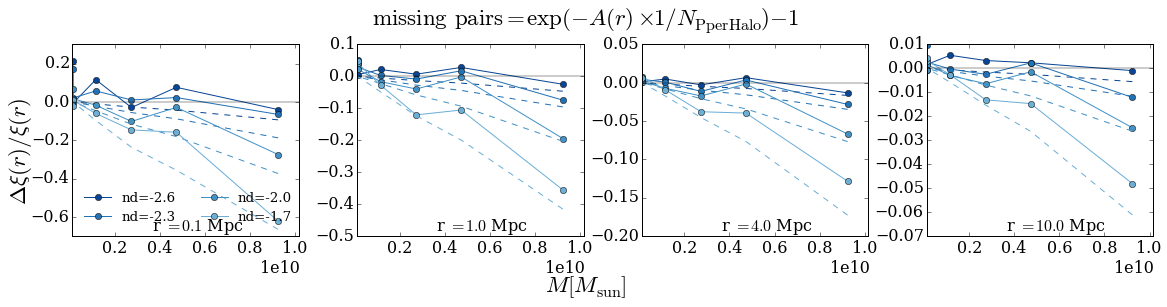

In [13]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()
def closest_ndidx(nd):
    return np.abs(nd_log_list-nd).argmin()
#vpeak
def fitfunc_r(r): 
    if np.log10(r) > 1.2:
        return 0
    return (1.2 - np.log10(r))**1.2*0.5   #11*10**-1.2
    
def fitfunc(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return (np.exp(-10.**1.15*fitfunc_r(r)*(m/cut)**1.0) - 1.0)
'''
def fitfunc(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return -10.**1.15*fitfunc_r(r)*(m/cut)**1.0
'''

cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)
cases_highres = [case.partition('-')[0]+('-2048' if box_size!=250. else '-2560') for case in cases_sorted]

proxy = 'vmax'
scales = (0.1,1.,5.,10.)
nd_log_list_this = (-2.6, -2.3, -2.0, -1.7)


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    resolution = np.zeros(len(cases_sorted))
    masslist = np.zeros((len(cases_sorted),2))
    pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))
    for i, case in enumerate(cases_sorted):
        box_size, npart, mass = parse_boxname(case)
        masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
        resolution[i] = mass
        masslist[i] = np.array([mass, masshighres])
        for j, nd_log in enumerate(nd_log_list_this):
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            pairdiff[j,i] = (low-high)/high
    for i, nd_log in enumerate(nd_log_list_this):
        ax.plot(resolution, pairdiff[i,:,closest_ridx(r)], '-o', label='nd='+str(nd_log), c=get_color(i))
        fit = np.array([fitfunc(case,nd_log,r)-fitfunc(case_high,nd_log,r)  for case,case_high in zip(cases_sorted, cases_highres)])
        #fit2 = np.array([fitfunc(case,nd_log,r)  for case,case_high in zip(cases_sorted, cases_highres)])
        ax.plot(resolution, fit, '--', c=get_color(i))
    ax.axhline(0, c='k', lw=0.4)
    ax.text(0.35, 0.1, r'r $ = {0:.1f}$ Mpc'.format(rbins[1::2][closest_ridx(r)]), transform=ax.transAxes, va='top', fontsize='medium');
    ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    if ii==0: ax.legend(frameon=False, numpoints=1,ncol=2, loc='best',fontsize='small')
            
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 0.9));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$M[M_{{\rm sun}}]$', ha='center', va='center', fontsize='x-large');
fig.text(0.5, 0.95, r'${\rm missing \, pairs}=\exp(-A(r)\times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/modeling_vmax_Nparticle.png')

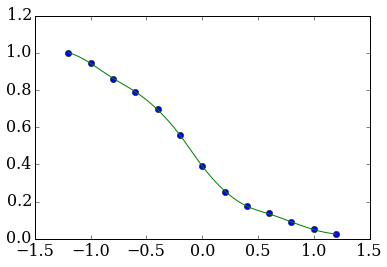

In [103]:
from scipy.interpolate import interp1d, UnivariateSpline
proxy = 'vpeak'
cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
cases = ['c250-512','c400-1024', 'c250-768','c250-1024']
ysum = np.zeros_like(rbins[1::2])
nd_log_list_this = np.linspace(-2.0, -1.7, 4)
for case in cases:
    for nd_log in nd_log_list_this:
        x = np.log10(rbins[1::2])
        box_size = parse_boxname(case)[0]
        y = load_pair_count(proxy, case, nd_log)/load_pair_count(proxy, case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'), nd_log) - 1.0
        y = np.array([min(i,0.1) for i in y])
        ysum += y/y[0] 
ysum = ysum/len(nd_log_list_this)/len(cases)
spl = UnivariateSpline(x, ysum)
spl.set_smoothing_factor(0.0001)
f_macc = interp1d(x, ysum, kind=3)
plt.plot(x,ysum,'o')
test = np.linspace(x[0],x[-1],100)
plt.plot(test,spl(test))

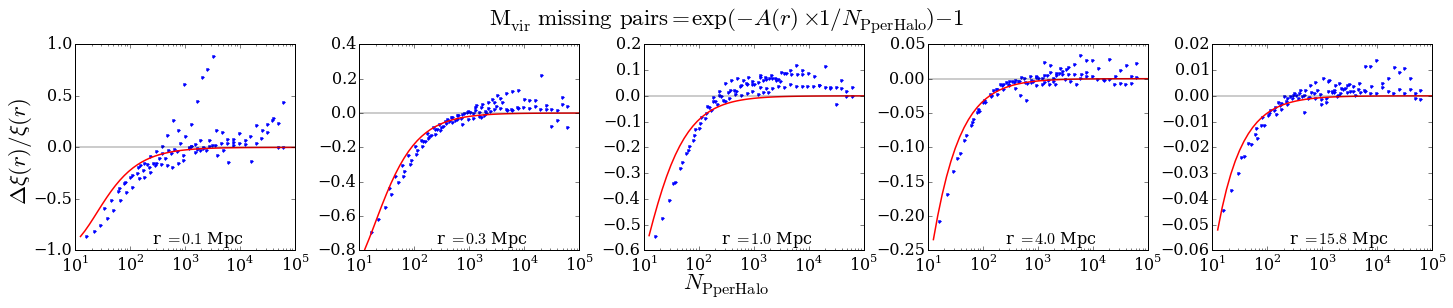

In [104]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()
def closest_ndidx(nd):
    return np.abs(nd_log_list-nd).argmin()
#vpeak
#vmax 1.4, 1.5, 0.3
def fitfunc_r(r): 
    if np.log10(r) > 1.2:
        return 0
    return (1.4 - np.log10(r))**1.8*0.3   #11*10**-1.2

def fitfunc_r(r): 
    return spl(np.log10(r))
    
def fitfunc(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return (np.exp(-10.**1.15*fitfunc_r(r)*(m/cut)**1.0) - 1.0)

def partperhalo(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return cut/m

def fitfunc_Npart(Npart):
    return np.exp(-10.**1.4*fitfunc_r(r)/Npart) - 1.0

cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-768', 'c250-512','c400-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)
cases_highres = [case.partition('-')[0]+('-2048' if box_size!=250. else '-2560') for case in cases_sorted]

proxy = 'vpeak'
scales = (0.06,1.,5.,15.)
scales = rbins[1::2][::3]
nd_log_list_this = (-2.6, -2.3, -2.0, -1.7)
nd_log_list_this = nd_log_list


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    resolution = np.zeros(len(cases_sorted))
    masslist = np.zeros((len(cases_sorted),2))
    pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))
    for i, case in enumerate(cases_sorted):
        box_size, npart, mass = parse_boxname(case)
        masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
        resolution[i] = mass
        masslist[i] = np.array([mass, masshighres])
        for j, nd_log in enumerate(nd_log_list_this):
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            pairdiff[j,i] = (low-high)/high
    for i, nd_log in enumerate(nd_log_list_this):
        Npart = np.array([partperhalo(case, nd_log, r) for case in cases_sorted])
        ax.semilogx(Npart, pairdiff[i,:,closest_ridx(r)], '.', label='nd='+str(nd_log),alpha=1.0,c='b')
        #fit = np.array([fitfunc(case,nd_log,r)-fitfunc(case_high,nd_log,r)  for case,case_high in zip(cases_sorted, cases_highres)])
        #ax.semilogx(Npart, fit, '--', c=get_color(i))
    Npartlist = np.logspace(1.1,5,50)
    ax.semilogx(Npartlist, [fitfunc_Npart(n) for n in Npartlist], c = 'r', lw = 1.5)
    ax.axhline(0, c='k', lw=0.4)
    ax.text(0.35, 0.1, r'r $ = {0:.1f}$ Mpc'.format(rbins[1::2][closest_ridx(r)]), transform=ax.transAxes, va='top', fontsize='medium');
    #ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    #if ii==0: ax.legend(frameon=False, numpoints=1,ncol=2, loc='best',fontsize='small')
            
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 0.9));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$N_{{\rm PperHalo}}$', ha='center', va='center', fontsize='x-large');
fig.text(0.5, 0.95, r'${\rm M_{vir} \, missing \, pairs}=\exp(-A(r) \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/missingpairs_mvir_Npperhalo.png')

## missing pairs, fit at each r

In [6]:
# fit A(r) for each r
def partperhalo(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return cut/m

cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
Npartperhalo = np.zeros((len(cases),len(nd_log_list)))
for j,case in enumerate(cases):
    cut = load_nd_limits('mvir', case)
    mass = parse_boxname(case)[2]
    Npartperhalo[j] = cut/mass

misspairs = np.zeros((len(proxies), len(cases),len(nd_log_list),len(rbins[1::2])))
for i,proxy in enumerate(proxies):
    for j,case in enumerate(cases):
        box_size, mass = parse_boxname(case)[1:]
        for k, nd_log in enumerate(nd_log_list):
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            misspairs[i,j,k] = (low-high)/high
            


In [7]:
from scipy.optimize import curve_fit
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()
def closest_ndidx(nd):
    return np.abs(nd_log_list-nd).argmin()
def fitmiss(x,a):
    return np.exp(-a/x) - 1.

alist = np.zeros((len(proxies), len(rbins[1::2])))
for pidx, proxy in enumerate(proxies):
    for ridx, r in enumerate(rbins[1::2]):
        alist[pidx,ridx] = curve_fit(fitmiss, Npartperhalo.flatten(), misspairs[pidx,:,:,ridx].flatten(), p0=0.03)[0]
        

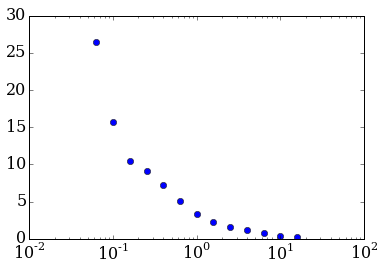

In [8]:
plt.semilogx(rbins[1::2],alist[3],'o')

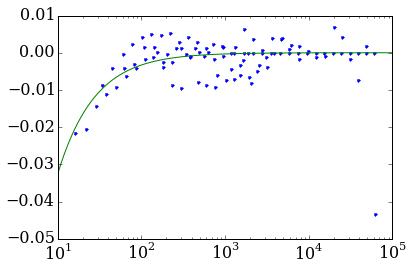

In [9]:
pidx = proxies.index('mvir')
ridx = closest_ridx(5)

test1 = Npartperhalo.flatten()
test2 = misspairs[pidx,:,:,ridx].flatten()

plt.semilogx( Npartperhalo.flatten(), misspairs[pidx,:,:,ridx].flatten(), '.')  
xx = np.logspace(1,5,100)
plt.semilogx(xx, fitmiss(xx,alist[pidx, ridx]))

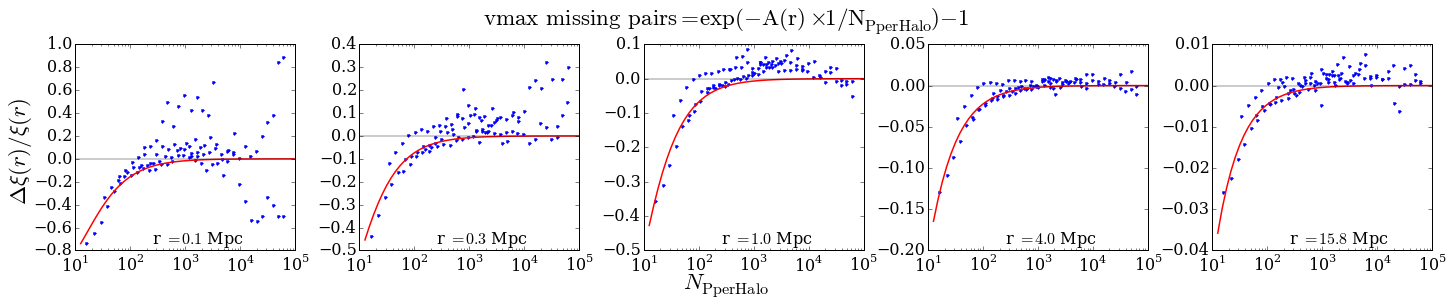

In [10]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]

cases_sorted = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024']
#cases_sorted = ['c250-768', 'c250-512','c400-1024']
cases_sorted = sorted(cases_sorted, key=lambda case: parse_boxname(case)[2], reverse=True)
cases_highres = [case.partition('-')[0]+('-2048' if box_size!=250. else '-2560') for case in cases_sorted]

proxy = 'vmax'
pidx = proxies.index(proxy)
scales = (0.06,1.,5.,15.)
scales = rbins[1::2][::3]
nd_log_list_this = (-2.6, -2.3, -2.0, -1.7)
nd_log_list_this = nd_log_list


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    ridx = closest_ridx(r)
    resolution = np.zeros(len(cases_sorted))
    masslist = np.zeros((len(cases_sorted),2))
    pairdiff = np.zeros((len(nd_log_list_this), len(cases_sorted), len(rbins[1::2])))
    for i, case in enumerate(cases_sorted):
        box_size, npart, mass = parse_boxname(case)
        masshighres = parse_boxname(case.partition('-')[0]+('-2048' if box_size!=250. else '-2560'))[2]
        resolution[i] = mass
        masslist[i] = np.array([mass, masshighres])
        for j, nd_log in enumerate(nd_log_list_this):
            low = load_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            pairdiff[j,i] = (low-high)/high
    for i, nd_log in enumerate(nd_log_list_this):
        Npart = np.array([partperhalo(case, nd_log, r) for case in cases_sorted])
        ax.semilogx(Npart, pairdiff[i,:,closest_ridx(r)], '.', label='nd='+str(nd_log),alpha=1.0,c='b')
        #fit = np.array([fitfunc(case,nd_log,r)-fitfunc(case_high,nd_log,r)  for case,case_high in zip(cases_sorted, cases_highres)])
        #ax.semilogx(Npart, fit, '--', c=get_color(i))
    Npartlist = np.logspace(1.1,5,50)
    ax.semilogx(Npartlist, [fitmiss(n,alist[pidx,ridx]) for n in Npartlist], c = 'r', lw = 1.5)
    ax.axhline(0, c='k', lw=0.4)
    ax.text(0.35, 0.1, r'r $ = {0:.1f}$ Mpc'.format(rbins[1::2][closest_ridx(r)]), transform=ax.transAxes, va='top', fontsize='medium');
    #ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    #if ii==0: ax.legend(frameon=False, numpoints=1,ncol=2, loc='best',fontsize='small')
            
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 0.9));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$N_{{\rm PperHalo}}$', ha='center', va='center', fontsize='x-large');
fig.text(0.5, 0.95, r'$ \rm  {0} \, missing \, pairs  =\exp(-A(r) \times 1/N_{{\rm PperHalo}})-1$'.format(proxy), ha='center', va='center', fontsize='x-large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/missingpairs_{}_Npperhalo.png'.format(proxy))

## modeling sample variance 


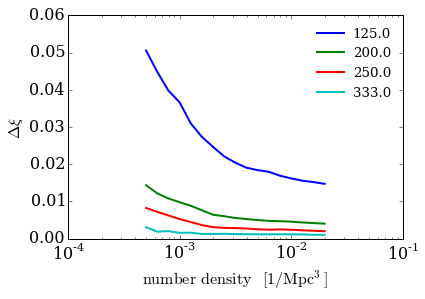

In [525]:
case = 'MDhigh'
proxy = 'vpeak'

box_size_this = (125.,200.,250.,333.)
x = 0.5*(rbins[:-1] + rbins[1:])
error = np.zeros((len(box_size_this), len(nd_log_list), len(x)))

for i, box_size in enumerate(box_size_this):
    for j, nd_log in enumerate(nd_log_list):
        samples = load_samples(proxy, nd_log, box_size, case)
        error[i,j] = np.std(samples, axis=0)/np.mean(samples, axis=0)
        y = np.std(samples, axis=0)/np.mean(samples, axis=0)
        y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
        error[i,j] = y**2 - y_poisson**2
for i, box_size in enumerate(box_size_this):
    plt.semilogx(10.**nd_log_list, error[i,:,13], '-',lw=2, label=box_size)
plt.legend(frameon=False, numpoints=1, loc='best', fontsize='small')
plt.xlabel(r'${\rm number \, density} \; [1/{{\rm Mpc}}^3]$')
plt.ylabel(r'$\Delta \xi$')

## nd, r dependence
* it seems r and nd can't be separated after all

In [6]:
case = 'MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
box_size_this = (125.,200.,250.,333.)
x = 0.5*(rbins[:-1] + rbins[1:])
error = np.zeros((len(box_size_this), len(nd_log_list),len(proxies), len(x)))

for i, box_size in enumerate(box_size_this):
    for j, nd_log in enumerate(nd_log_list):
        for k, proxy in enumerate(proxies):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[i,j,k] = y**2 - y_poisson**2
            #error[i,j,k] = np.std(samples, axis=0)/np.mean(samples, axis=0)

In [8]:
from scipy.optimize import curve_fit
def fitfunc(x,a,b,c):
    return a + b*x**-c
'''
def fitfunc(x,a,c):
    return a + 2.e-5*x**-c

'''
x = 0.5*(rbins[1:]+rbins[:-1])

clist = np.zeros((len(proxies), len(x),3))
#clist = np.zeros((len(x),2))
for i,proxy in enumerate(proxies):
    for j,r in enumerate(x):
        if r > 0.4:
            clist[i,j] = curve_fit(fitfunc, 10.**nd_log_list, error[0,:,i,j],p0=[ 0.005,3e-6,1.05])[0]
        #clist[i] = curve_fit(fitfunc, 10.**nd_log_list, error[0,:,i+10],p0=[ 0.007,1.8])[0]

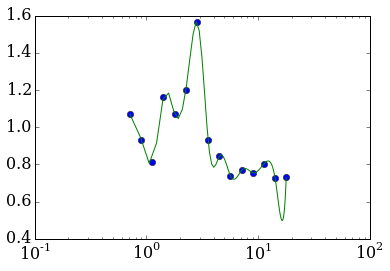

In [28]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
inter = interp1d(x[11:],clist[3,11:,2],3)

plt.semilogx(x[11:], clist[3,11:,2], 'o')
px = np.linspace(x[11],x[-1],100)
plt.semilogx(px, inter(px))

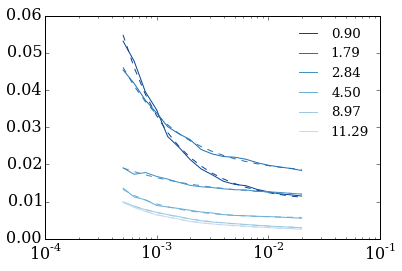

In [560]:
from palettable.colorbrewer.sequential import Blues_7#RdYlBu_4
def get_color(i):
    return Blues_7.mpl_colors[::-1][i]
x = 0.5*(rbins[1:]+rbins[:-1])
def closest_ridx(r):
    return np.abs(x-r).argmin()
def fitfunc(x,a,b,c):
    return a + b*x**-c

scales = (1,2,3,5,10,11)
for i,r in enumerate(scales):
    plt.semilogx(10**nd_log_list,error[0,:,0,closest_ridx(r)], c = get_color(i), label='{0:.2f}'.format(x[closest_ridx(r)]))
    para = clist[0,closest_ridx(r)]
    plt.semilogx(10**nd_log_list, fitfunc(10.**nd_log_list,para[0],para[1],para[2]), c = get_color(i), ls='--')
plt.legend(frameon=False, fontsize='small')

array([  1.25917919e-02,   7.73520387e-05,   8.18394120e-01])

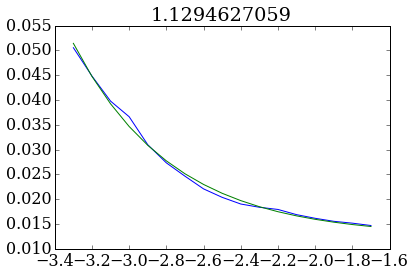

In [676]:
from scipy.optimize import curve_fit
x = 0.5*(rbins[1:]+rbins[:-1])
def fitfunc(x,a,b,c):
    return a + b*x**-c
r=1.1
y=error[0,:,0,closest_ridx(r)]
popt, pcov = curve_fit(fitfunc, 10.**nd_log_list, y,p0=[ 0.005,3e-6,1.1])
plt.plot(nd_log_list, y)
plt.plot(nd_log_list, fitfunc(10**nd_log_list, popt[0],popt[1],popt[2]))
plt.title(x[closest_ridx(r)])
popt

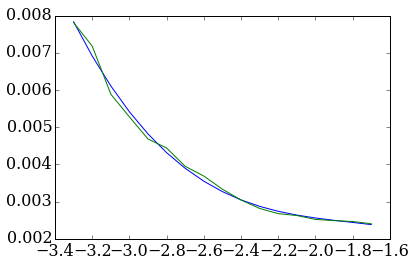

In [333]:
r=5
p3 = np.poly1d(np.polyfit(nd_log_list, error[0,:,closest_ridx(r)],3))
plt.plot(nd_log_list, p3(nd_log_list))
plt.plot(nd_log_list, error[0,:,closest_ridx(r)])

### boxsize dependence

In [53]:
case = 'MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
box_size_this = (125.,200.,250.,333.)
x = 0.5*(rbins[:-1] + rbins[1:])
error = np.zeros((len(box_size_this), len(nd_log_list),len(proxies), len(x)))

for i, box_size in enumerate(box_size_this):
    for j, nd_log in enumerate(nd_log_list):
        for k, proxy in enumerate(proxies):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[i,j,k] = y**2 - y_poisson**2
            #error[i,j,k] = np.std(samples, axis=0)/np.mean(samples, axis=0)

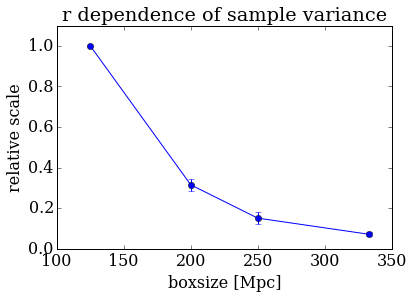

In [54]:
ratiolist = [[],[],[]]
x = 0.5*(rbins[1:]+ rbins[:-1])
for i,nd_log in enumerate(nd_log_list):
    for j in range(len(proxies)):
        for k,r in enumerate(x):
            if r > 0.9 and nd_log > -3.0:
                for l in range(len(box_size_this)-1):
                    ratiolist[l].extend([error[1+l, i,j,k]/error[0, i,j,k]])
ratiolist = np.array(ratiolist)
errorbar = np.insert(np.std(ratiolist, axis=-1),0,0)
plt.errorbar(box_size_this, np.insert(np.mean(ratiolist, axis = -1),0,1),yerr = errorbar,ls='-',lw = 1,fmt='o')

plt.xlabel('boxsize [Mpc]')
plt.ylabel('relative scale')
plt.title('r dependence of sample variance')
plt.ylim(0,1.1)
plt.savefig('plots/sample_variance_boxsize_dependence.png')

(array([  62.,   82.,   61.,  183.,  142.,  101.,   33.,   10.,    1.,    1.]),
 array([ 0.09110728,  0.10770979,  0.1243123 ,  0.14091481,  0.15751732,
         0.17411984,  0.19072235,  0.20732486,  0.22392737,  0.24052988,
         0.25713239]),
 <a list of 10 Patch objects>)

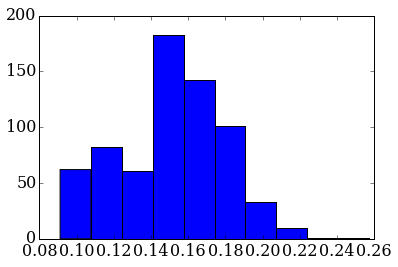

In [40]:
plt.hist(ratiolist[1])

In [41]:
boxscale = np.insert(np.mean(ratiolist,axis=-1),0,1)
boxscale

array([ 1.        ,  0.31539484,  0.15130592,  0.07164357])

### combine nd, r, box_size

In [33]:
print boxscale
print clist.shape

[ 1.          0.30791199  0.14656615  0.07078227]
(4, 26, 3)


In [42]:
def fitfunc(x,a,b,c):
    return a + b*x**-c

def sample_variance(proxy, boxsize, r, nd_log):
    if not (type(r) == float or type(r)== int):
        fit = np.zeros(len(r))
        for i,rr in enumerate(r):
            para = clist[proxies.index(proxy), np.abs(x-rr).argmin()]
            fit[i] = fitfunc(10.**nd_log, para[0], para[1], para[2])*boxscale[box_size_this.index(boxsize)]
        return fit
    para = clist[proxies.index(proxy), np.abs(x-r).argmin()]
    return fitfunc(10.**nd_log, para[0], para[1], para[2])*boxscale[box_size_this.index(boxsize)]

sample_variance('mvir', 125., x, -2.5)
sample_variance('mvir', 125., 5, nd_log_list)

array([ 0.00582024,  0.00510082,  0.00450677,  0.00401624,  0.00361119,
        0.00327672,  0.00300053,  0.00277248,  0.00258416,  0.00242866,
        0.00230026,  0.00219423,  0.00210668,  0.00203439,  0.00197469,
        0.0019254 ,  0.00188469])

In [622]:
error.shape

(4, 17, 4, 26)

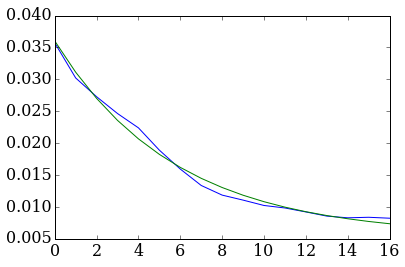

In [623]:
plt.plot(error[0,:,0,closest_ridx(0.7)])
plt.plot(sample_variance('vpeak',125.,0.7,nd_log_list) )

### huge subplot
* boxsize: different lines
* nd: x-axis
* scale: rows
* proxies: columns

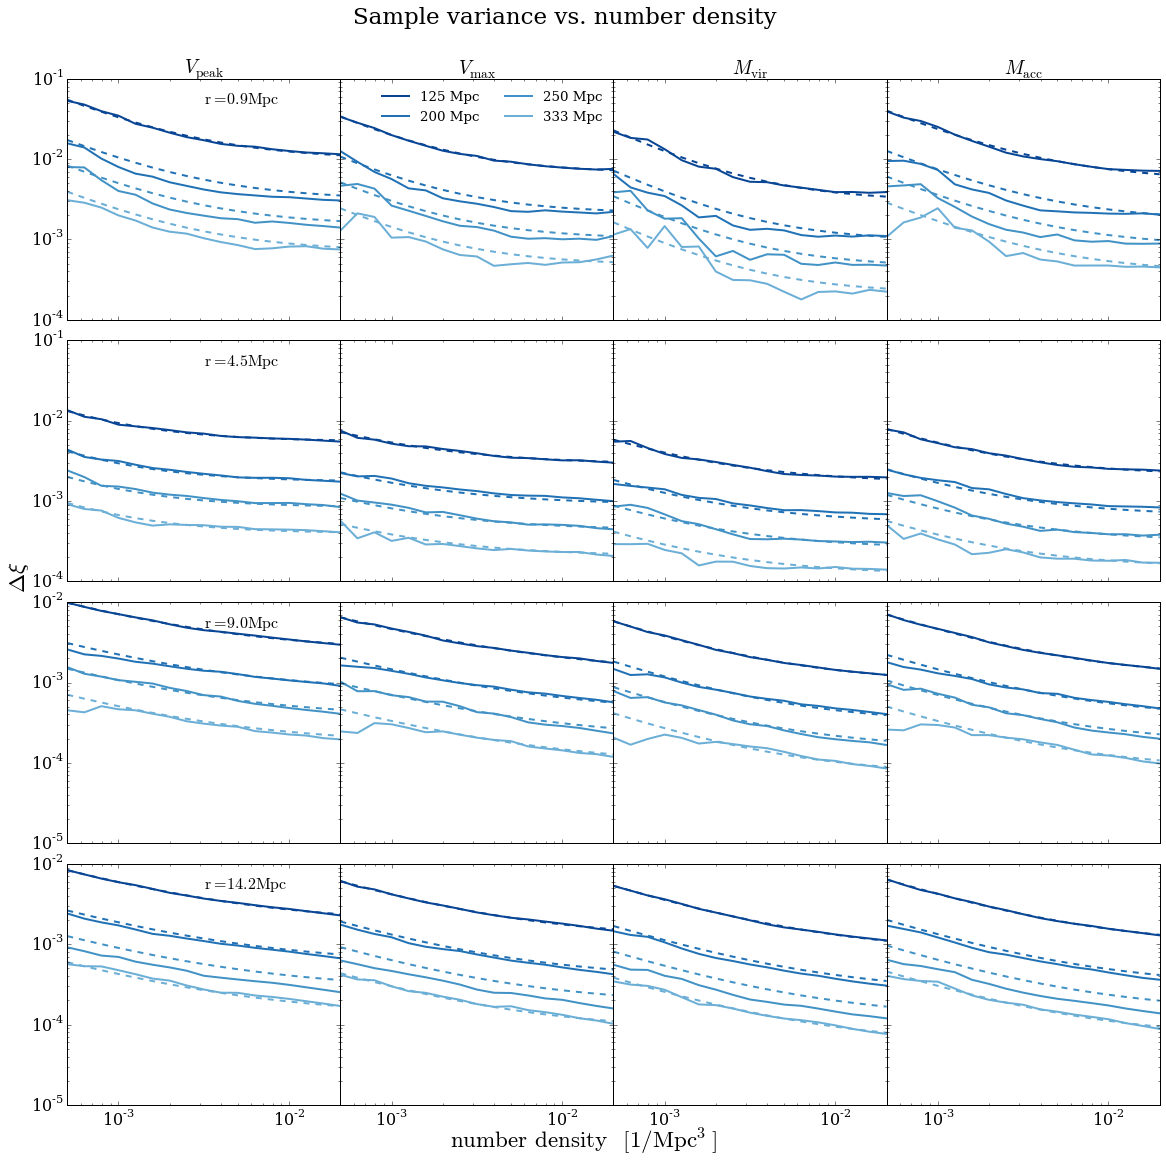

In [47]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]
x = 0.5*(rbins[:-1] + rbins[1:])
def closest_ridx(r):
    return np.abs(x-r).argmin()

case='MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [0.9, 5., 10.,15]
box_size_this = (125.,200.,250.,333.)
#box_size_this = (200.,250.,333.)
error = np.zeros((len(box_size_this), len(nd_log_list), len(x)))

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(scales), figsize=(4*len(proxies), 4*len(scales)), sharex=True, sharey='row')
for i, (ax_row, scale) in enumerate(zip(ax, scales)):
    ridx = closest_ridx(scale)
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for ii, box_size in enumerate(box_size_this):
            for jj, nd_log in enumerate(nd_log_list):
                samples = load_samples(proxy, nd_log, box_size, case)
                y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
                y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
                error[ii,jj] = y**2 - y_poisson**2
        for ii, box_size in enumerate(box_size_this):
            ax_this.semilogx(10.**nd_log_list, error[ii,:,ridx], '-',lw=2,c=get_color(ii), label='{} Mpc'.format(int(box_size)))
            fit = sample_variance(proxy, box_size, scale, nd_log_list)
            ax_this.loglog(10.**nd_log_list,fit, '--',lw=2,c=get_color(ii))
        #plot settings:
        ax_this.set_xlim(10.**nd_log_list[0],10.**nd_log_list[-1]);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.5, 0.95, r'${{\rm r}} = {0:.1f} {{\rm Mpc}}$'.format(x[ridx]), transform=ax_this.transAxes, va='top', fontsize='medium');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='small', numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'${\rm number \, density} \; [1/{{\rm Mpc}}^3]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Sample variance vs. number density', fontsize='x-large')
plt.savefig('plots/sample_variance_vs_number_density_fit.png')

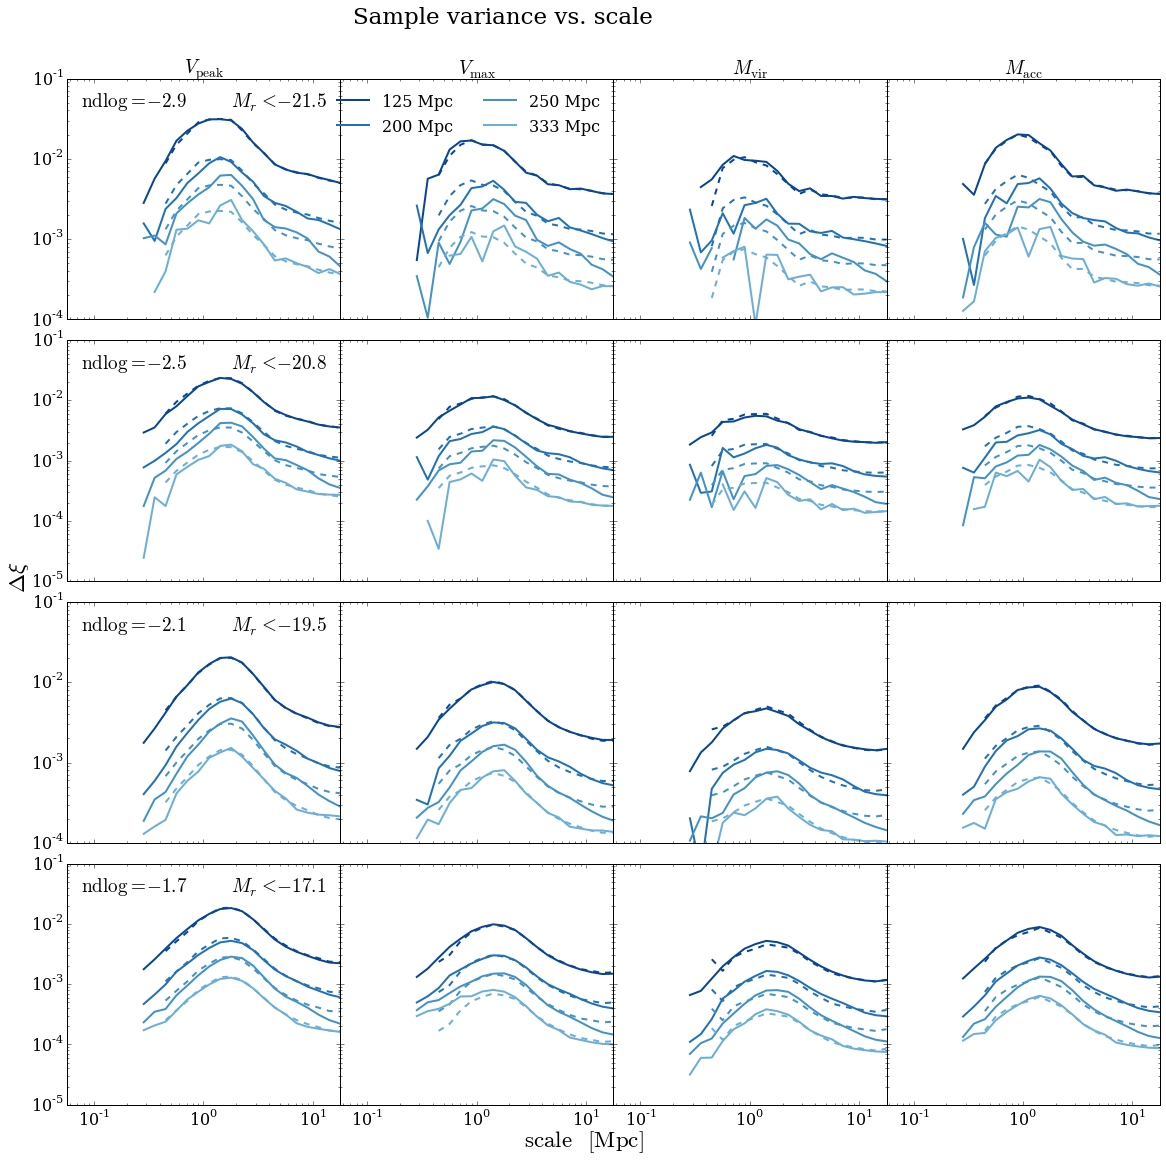

In [51]:
from palettable.colorbrewer.sequential import Blues_8#RdYlBu_4
def get_color(i):
    return Blues_8.mpl_colors[::-1][i]
x = 0.5*(rbins[:-1] + rbins[1:])
def closest_ridx(r):
    return np.abs(x-r).argmin()

case='MDhigh'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
scales = [ 1.3,5, 10.]
nd_log_list_this = (-2.9,-2.5,-2.1,-1.7)
box_size_this = (125.,200.,250.,333.)
#box_size_this = (200.,250.,333.)
error = np.zeros((len(box_size_this), len(x)))
ridxcut = 7


fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(4*len(proxies), 4*len(nd_log_list_this)), sharex=True, sharey='row')
for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    ridx = closest_ridx(scale)
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for ii, box_size in enumerate(box_size_this):
            samples = load_samples(proxy, nd_log, box_size, case)
            y = np.std(samples, axis=0)/ np.mean(samples, axis=0)
            y_poisson = 1/np.sqrt(np.mean(samples, axis=0))
            error[ii] = y**2 - y_poisson**2
            ax_this.semilogx(x[ridxcut:], error[ii][ridxcut:], '-',lw=2,c=get_color(ii), label='{} Mpc'.format(int(box_size)))
            fit = sample_variance(proxy, box_size, x, nd_log)
            ax_this.loglog(x[ridxcut:],fit[ridxcut:], '--',lw=2,c=get_color(ii))
        #plot settings:
        ax_this.set_xlim(x[0],x[-1]);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.05, 0.95, r'${{\rm ndlog}} = {0:.1f} $'.format(nd_log), transform=ax_this.transAxes, va='top', fontsize='large');
        if not j: ax_this.text(0.6, 0.95, r'$M_r < {:.1f}$'.format(af.match(10.0**nd_log)), transform=ax_this.transAxes, va='top', fontsize='large');
        if i==0 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='medium', numpoints=1);
        #if i==0 and j==3: ax_this.legend(['$M_r < {:.1f}$'.format(af.match(10.0**nd_log)) for nd_log in nd_log_list_this],loc='best', frameon=False, ncol=1, numpoints=1 , fontsize='medium');    
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 0.95));
fig.text(0.01, 0.5, r'$\Delta \xi$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'${\rm scale} \; [{\rm Mpc}]$', ha='center', va='center', fontsize='x-large');
fig.text(0.3, 0.98, 'Sample variance vs. scale', fontsize='x-large')
plt.savefig('plots/sample_variance_vs_scale_fit.png')

In [46]:
x

array([  0.05660723,   0.07126428,   0.08971641,   0.11294627,
         0.14219093,   0.17900778,   0.22535744,   0.2837082 ,
         0.35716747,   0.4496472 ,   0.56607229,   0.71264279,
         0.89716412,   1.12946271,   1.4219093 ,   1.79007775,
         2.25357437,   2.83708205,   3.57167468,   4.49647202,
         5.66072289,   7.1264279 ,   8.97164117,  11.29462706,
        14.21909302,  17.90077754])

## Sample variance, Missing pairs vs. Number densities
* given boxsize, and scale (1Mpc, 10Mpc)
* sample variane decrease slowly as nd increases
* missing pairs increase as nd increases
* Two curves will cross at some point

In [74]:
test=np.load('/u/ki/yymao/ki-des/ds14_i_4096/hlist_1.00000.npy')[['x','y','z']]

In [75]:
test.shape

(50897760,)

In [83]:
10**-0.5*400**3

20238577.02507763

In [82]:
4096**3/400**3

1073